# UT7: El Poder de la Visualización Efectiva

Análisis de datos con Python

# UT7: Visualización de Datos

> **Cuaderno de trabajo — UT7: Visualización de Datos**
>
> Este notebook contiene los ejercicios de la unidad. Para la teoría
> completa consulta el libro (PDF).

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Cargar dataset desde repositorio público
URL = "https://raw.githubusercontent.com/jgarcia314/analisis-datos-python-fp/main/data/raw/house_prices.csv"
df = pd.read_csv(URL, na_values=["NA"])

# Imputación: mediana para numéricas, moda para categóricas
num_cols = df.select_dtypes(include="number").columns
cat_cols = df.select_dtypes(include="object").columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

print(f"Dataset: {df.shape[0]} viviendas × {df.shape[1]} características")
print(f"Variables clave para visualizar:")
print(f"  SalePrice   — precio de venta  (mediana: ${df['SalePrice'].median():,.0f})")
print(f"  GrLivArea   — área habitable   (mediana: {df['GrLivArea'].median():,.0f} sq ft)")
print(f"  OverallQual — calidad general  (rango: {df['OverallQual'].min()}-{df['OverallQual'].max()})")
print(f"  YearBuilt   — año construcción (rango: {df['YearBuilt'].min()}-{df['YearBuilt'].max()})")
print(f"  Neighborhood — barrio          ({df['Neighborhood'].nunique()} barrios distintos)")

Dataset: 1460 viviendas × 81 características
Variables clave para visualizar:
  SalePrice   — precio de venta  (mediana: $163,000)
  GrLivArea   — área habitable   (mediana: 1,464 sq ft)
  OverallQual — calidad general  (rango: 1-10)
  YearBuilt   — año construcción (rango: 1872-2010)
  Neighborhood — barrio          (25 barrios distintos)

**Manos a la Obra**

### *line plot* personalizado

**Objetivo:** crear un *line plot* profesional que muestre la evolución
temporal de precios usando la interfaz OOP.

1.  Agrupa el dataset por `YearBuilt` y calcula el precio medio
    (`SalePrice`).
2.  Crea una figura con `plt.subplots()` y tamaño adecuado.
3.  Plotea la serie temporal con marcadores.
4.  Añade una línea horizontal de referencia en la mediana global
    (`ax.axhline()`).
5.  Personaliza: título descriptivo, etiquetas con unidades, leyenda y
    grid.
6.  Usa `FuncFormatter` para mostrar el eje Y en formato `$180K`.
7.  Guarda en alta resolución (300 DPI).
8.  ¿Por qué la interfaz OOP es preferible a `pyplot` en proyectos
    profesionales? ¿En qué escenario sería aceptable usar `pyplot`?

**Criterio de éxito:** Tu gráfico muestra claramente la tendencia
creciente de precios con el año, con la línea de mediana como referencia
visual. Las etiquetas son legibles y el formato de precios usa el sufijo
K.

Consulta el **Apéndice C.6** para repasar los comandos de
personalización de ejes y el uso de `FuncFormatter`.

``` python
# Introduce aquí el código
```

**Tiempo estimado:** 15 minutos

**Manos a la Obra**

### Panel de comparativa de superficies

**Objetivo:** Crear un panel multi-gráfico (layout 2x2) que permita
comparar visualmente la distribución de diferentes medidas de superficie
de las viviendas.

**Contexto profesional:** El equipo de tasación necesita una vista
rápida de cómo se distribuyen los diferentes espacios de las casas para
identificar si existen sesgos en la toma de datos.

**Instrucciones (Guiado):**

1.  Selecciona estas 4 variables de superficie: `LotArea`, `GarageArea`,
    `TotalBsmtSF` (sótano) y `1stFlrSF` (primera planta).
2.  Genera una figura con 2 filas y 2 columnas usando `plt.subplots()`.
3.  En cada uno de los 4 subplots, dibuja un histograma (usa 30 bins)
    con un color corporativo diferente para cada uno.
4.  Añade una línea vertical roja que marque la **mediana** de cada
    distribución (`ax.axvline`).
5.  **Personalización:** Añade títulos individuales a cada gráfico y un
    título global a la figura que diga “Distribución de Superficies
    (sqft)”.
6.  Aplica `plt.tight_layout()` al final para asegurar que los títulos
    no se pisen entre sí.

**Criterio de éxito:** Presentar una única imagen con 4 histogramas
perfectamente alineados, etiquetados y con sus respectivas líneas de
mediana.

**Tiempo estimado:** 15 minutos

``` python
# Escribe tu codigo aqui
```

**Manos a la Obra**

### *boxplot* comparativo

**Objetivo:** crear un *boxplot* comparativo horizontal ordenado por
mediana para facilitar la lectura de categorías.

1.  Filtra solo los 10 barrios con más viviendas
    (`value_counts().head(10)`).
2.  Calcula la mediana de precio por barrio y ordena de mayor a menor.
3.  Crea un *boxplot* **horizontal** (`vert=False`).
4.  Usa `patch_artist=True` para colorear las cajas con un degradado.
5.  Añade *grid* y formato de precios en el eje X.

**Criterio de éxito:** *boxplot* horizontal con 10 barrios ordenados por
mediana. Los barrios con mayor precio aparecen arriba. Cada caja tiene
un color diferente del degradado.

Los *boxplots* horizontales son ideales cuando los nombres de las
categorías son largos. Repasa la anatomía del *boxplot* en el **Apéndice
C.6**.

``` python
# Introduce aquí el código
```

**Tiempo estimado:** 15 minutos

**Manos a la Obra**

### Comparar Estilos Seaborn

**Objetivo:** Comparar visualmente los estilos de Seaborn para elegir el
más adecuado según el contexto.

1.  Crea un panel 1x3 con el mismo scatterplot (`GrLivArea` vs
    `SalePrice`, `hue=OverallQual`).
2.  Aplica un estilo diferente a cada subplot: `darkgrid`, `white`,
    `ticks`.
3.  Usa `sns.set_theme(style=...)` antes de cada plot.
4.  ¿Cuál estilo elegirías para una presentación ejecutiva? ¿Y para un
    paper científico? Justifica tu elección.

**Criterio de éxito:** Panel con 3 scatterplots idénticos excepto por el
estilo visual. Puedes argumentar por qué un estilo es mejor que otro
para cada contexto.

Los estilos de Seaborn (`whitegrid`, `dark`, etc.) cambian radicalmente
la estética del gráfico con una sola línea. Repasa los estilos en el
**Apéndice C.6**.

``` python
# Introduce aquí el código
```

**Tiempo estimado:** 10 minutos

**Manos a la Obra**

### Distribuciones Avanzadas

**Objetivo:** Comparar boxplot y violinplot para entender qué
información adicional aporta cada uno.

1.  Crea un `histplot` de `SalePrice` con curva KDE superpuesta
    (`kde=True`).
2.  Añade la línea de mediana como referencia vertical.
3.  Filtra los top 5 barrios por número de viviendas.
4.  Crea un panel 1x2: boxplot (izquierda) vs violinplot (derecha) del
    precio por barrio.
5.  Compara ambos: ¿qué información adicional revela el violinplot?

**Criterio de éxito:**

-   El histplot muestra la distribución con KDE y línea de mediana.
-   El panel boxplot/violinplot permite comparar ambas representaciones.
-   Puedes explicar que el violinplot revela distribuciones bimodales o
    asimetrías que el boxplot oculta.

Seaborn destaca en la visualización de distribuciones. Repasa `histplot`
y `violinplot` en el **Apéndice C.6**.

<figure>
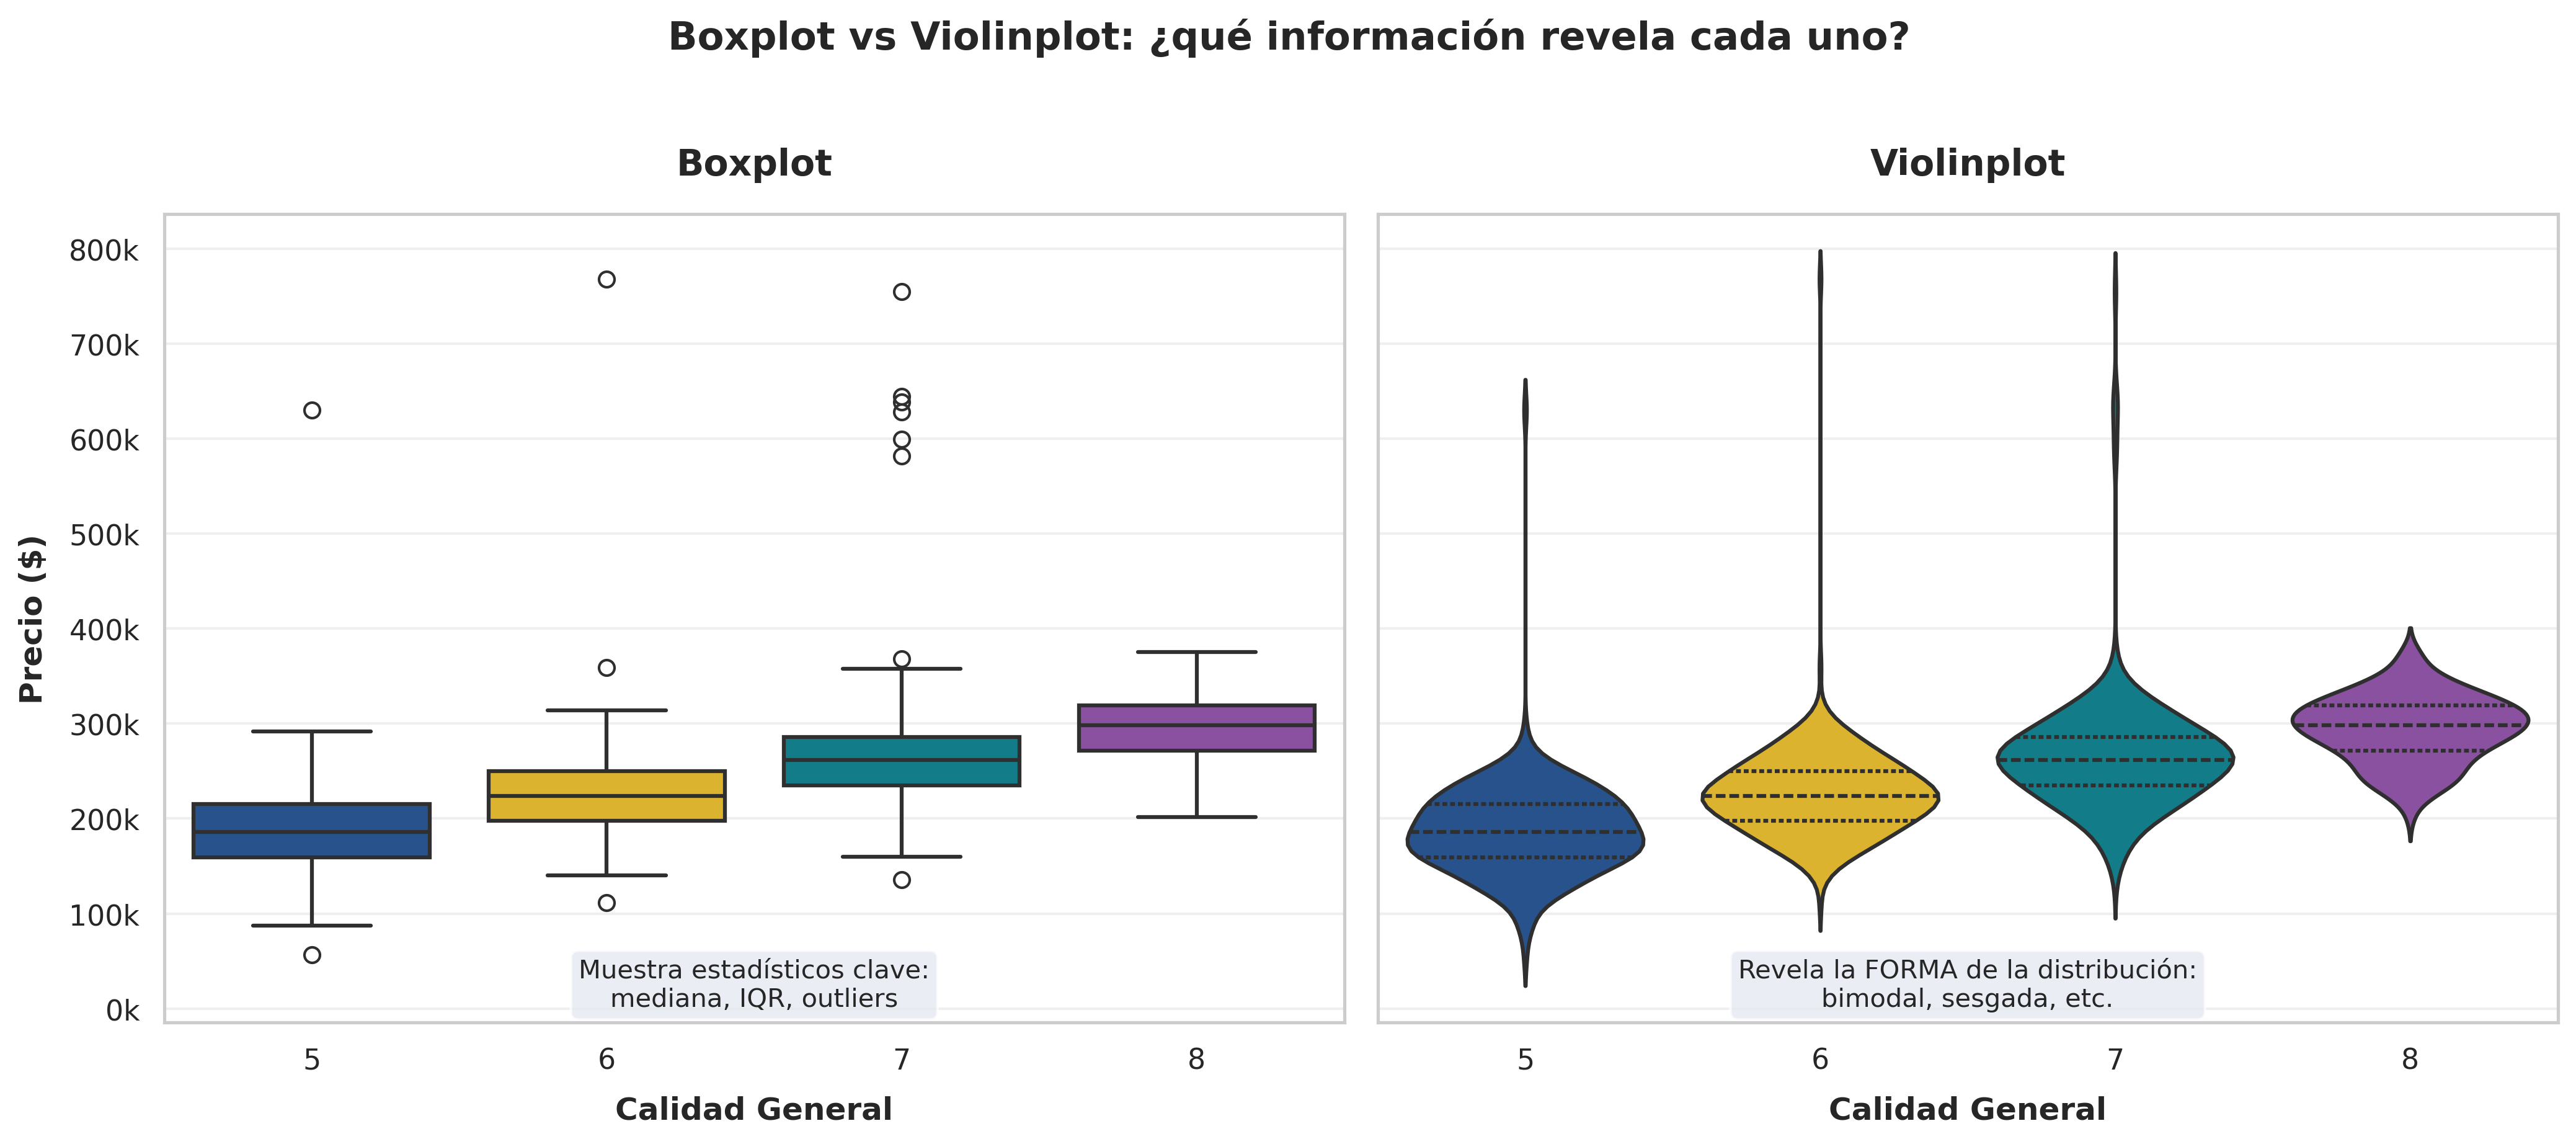
<figcaption aria-hidden="true">Boxplot vs. violinplot: información
oculta</figcaption>
</figure>

``` python
# Introduce aquí el código
```

**Tiempo estimado:** 20 minutos

**Manos a la Obra**

### análisis de relaciones

**Objetivo:** explorar relaciones bivariantes y multivariantes usando
*scatter plots*, regresión y *pair plots*.

1.  Filtra los *top* 3 barrios y crea un *scatter plot* de `GrLivArea`
    vs. `SalePrice` con `hue=Neighborhood`.
2.  Crea un `regplot` del *dataset* completo para ver la tendencia
    lineal con banda de confianza.
3.  Calcula $R^2$ y añádelo como texto con `ax.text()` y un `bbox`.
4.  Crea un `pairplot` de 5 variables numéricas clave (usa
    `corner=True`).

**Criterio de éxito:**

-   *Scatter plot* muestra los 3 barrios con colores diferenciados.
-   `regplot` incluye la ecuación $R^2$ en un cuadro de texto.
-   `pairplot` revela las relaciones entre las 5 variables
    seleccionadas.

Repasa `scatterplot`, `regplot` y `pairplot` en el **Apéndice C.6**. Son
las herramientas clave para descubrir patrones bivariantes.

``` python
# Introduce aquí el código
```

**Tiempo estimado:** 20 minutos

**Manos a la Obra**

### Heatmaps de correlación y concentración

**Objetivo:** Crear visualizaciones matriciales complejas para detectar
dependencias y patrones de precios.

**Contexto profesional:** Debes presentar al departamento de marketing
un informe visual que identifique qué variables están más relacionadas
entre sí y cómo varían los precios en las zonas de mayor interés.

**Tu Misión (Semi-autónomo):**

1.  Selecciona al menos 8 variables numéricas del dataset y genera su
    **matriz de correlación**.
2.  Representa dicha matriz mediante un `sns.heatmap` personalizado: usa
    un mapa de color divergente (como `RdBu` o `coolwarm`), añade
    anotaciones con 2 decimales y asegura que el título sea profesional.
3.  **Análisis por zonas:** Crea una tabla dinámica que muestre el
    precio de venta medio cruzando el barrio (`Neighborhood`) con la
    calidad del garaje (`GarageQual`). Selecciona solo los 5 barrios más
    frecuentes para evitar saturar el gráfico.
4.  Representa esta tabla dinámica mediante un segundo heatmap, esta vez
    usando un mapa de color secuencial (como `YlOrBr`) que resalte los
    precios más altos.

**Criterio de éxito:** Entrega de dos gráficos perfectamente
etiquetados. La matriz de correlación debe permitir identificar
visualmente las 3 variables más correlacionadas con el precio.

**Tiempo estimado:** 20 minutos

``` python
# Escribe tu codigo aqui
```

**Manos a la Obra**

### gráficos categóricos

**Objetivo:** crear *countplots* y *barplots* con estadísticas y barras
de error.

1.  Crea un countplot horizontal de los top 10 barrios (usa `order` para
    ordenar por frecuencia).
2.  Añade etiquetas de valor a las barras con `ax.bar_label()`.
3.  Crea un barplot de precio medio por `OverallQual` con barras de
    error (`errorbar='sd'`).
4.  Añade una línea de referencia con el precio medio global.

**Criterio de éxito:**

-   Countplot muestra los 10 barrios con etiquetas de frecuencia.
-   Barplot incluye barras de error (sd) visibles y una línea de media
    global.
-   Puedes interpretar que la variabilidad aumenta con la calidad.

Seaborn simplifica enormemente la creación de gráficos categóricos
agregados. Repasa `countplot` y `barplot` en el **Apéndice C.6**.

``` python
# Introduce aquí el código
```

**Tiempo estimado:** 15 minutos

**Manos a la Obra**

### personalización profesional

**Objetivo:** crear un *scatter plot* con nivel de acabado profesional:
anotaciones, líneas de referencia, leyenda y formato listo para
presentación.

1.  Crea un *scatter* de `GrLivArea` vs. `SalePrice`.
2.  Añade líneas de referencia en las medianas (horizontal y vertical).
3.  Identifica y resalta *outliers* (casas \> 600 k\$) con marcadores
    especiales (`marker='*'`).
4.  Usa `ax.annotate()` con flecha para señalar la vivienda más cara.
5.  Añade leyenda profesional con `frameon=True, shadow=True`.
6.  Formatea el eje Y con `FuncFormatter` para mostrar precios en k\$.
7.  Guarda a 300 DPI.

**Criterio de éxito:** gráfico con aspecto profesional que incluye:
*scatter* de datos, líneas de referencia, *outliers* destacados con
estrella, anotación con flecha al máximo, leyenda completa y formato de
precios legible. Listo para presentación ejecutiva.

La personalización avanzada separa a los analistas *junior* de los
*senior*. Consulta cómo añadir anotaciones y personalizar leyendas en el
**Apéndice C.6**.

``` python
# Introduce aquí el código
```

**Tiempo estimado:** 25 minutos

**Manos a la Obra**

### narrativa visual integrada

**Objetivo:** Crear una narrativa visual completa siguiendo los 4 pasos
del Data Storytelling aplicados al dataset House Prices.

**Instrucciones:**

1.  **CONTEXTO** (1 gráfico): Histograma de distribución de precios con
    KDE y línea de mediana
2.  **EXPLORACION** (2 gráficos): Panel 1x2 con scatter (Área vs Precio)
    y boxplot (Calidad vs Precio), ambos con R² anotado
3.  **HALLAZGO** (1 gráfico): Barplot horizontal de correlaciones de 5
    variables con SalePrice, destacando la más alta en rojo
4.  **CONCLUSIÓN**: Texto impreso con recomendación accionable basada en
    los datos

**Pistas:**

-   Usa `pearsonr()` o `df.corr()` para obtener la correlación `r` de
    cada variable (para R², eleva al cuadrado: `r**2`)
-   `np.argsort()` ordena las correlaciones
-   Destaca la barra más alta con un color diferente
-   `ax.annotate()` con flecha para señalar el hallazgo clave
-   Guarda cada gráfico como archivo PNG separado

**Criterio de éxito:**

-   3 gráficos que cuentan una historia coherente: contexto →
    exploración → hallazgo
-   El hallazgo esta claramente destacado (color, anotación)
-   La conclusión es accionable: incluye recomendaciones para
    vendedores, compradores o inversores
-   Formato profesional: títulos descriptivos, etiquetas con unidades,
    paleta accesible

**Tiempo estimado:** 20 minutos

*Solución disponible en el cuaderno de prácticas resueltas.*

``` python
# Escribe tu codigo aqui
```